In [1]:
options(repr.plot.width = 7, repr.plot.height = 6)
options(jupyter.plot_mimetypes = c('application/pdf', 'image/png'))
set.seed(1)

Diffusion Pseudo Time (DPT) is a pseudo time metric based on the transition probability of a diffusion process <cite data-cite=haghverdi_diffusion_2016>(Haghverdi et al., 2016)</cite>.

*destiny*  supports `DPT` in addition to its primary function of creating `DiffusionMap`s from data.

In [2]:
library(destiny)  # load destiny…
data(guo)         # …and sample data

`DPT` is in practice independent of Diffusion Maps:

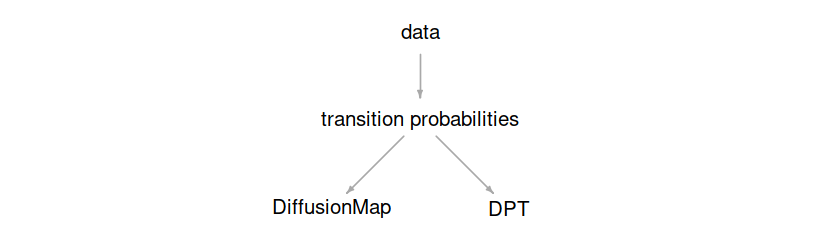

In [3]:
old <- options(repr.plot.height = 2)
par(mar = rep(0, 4))
graph <- igraph::graph_from_literal(
    data -+ 'transition probabilities' -+ DiffusionMap,
    'transition probabilities' -+ DPT)
plot(
    graph, layout = igraph::layout_as_tree,
    vertex.size = 50,
    vertex.color = 'transparent',
    vertex.frame.color = 'transparent',
    vertex.label.color = 'black')
options(old)

However in order not to overcomplicate things, in *destiny*, you have to create `DPT` objects from `DiffusionMap` objects.  
<small>(If you really only need the DPT, skip Diffusion Component creation by specifying `n_eigs = 0`)</small>

In [4]:
dm <- DiffusionMap(guo)
dpt <- DPT(dm)

The resulting object of a call like this will have three automatically chosen tip cells. Plotting without parameters results in the DPT of the first root cell:

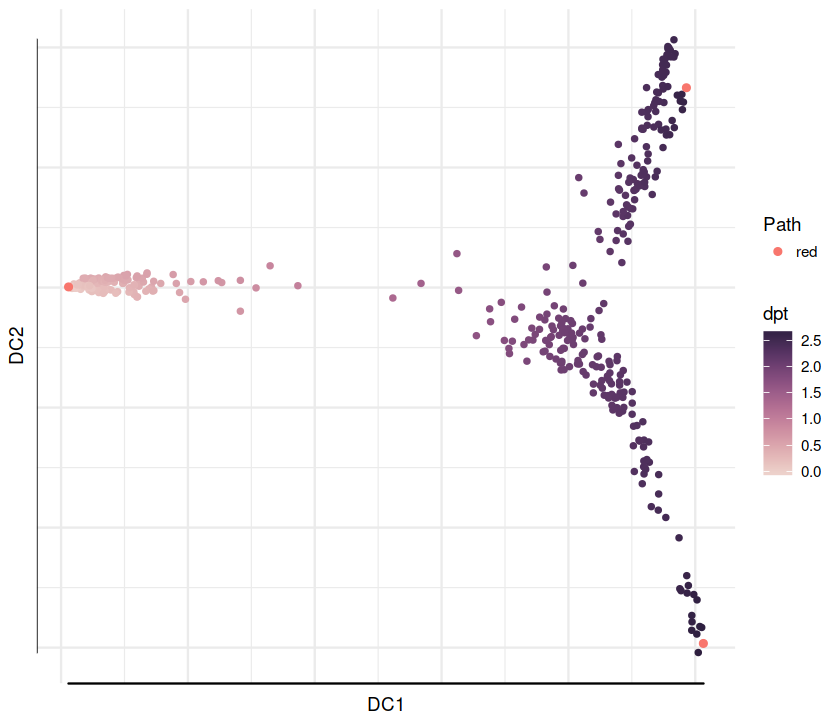

In [5]:
plot(dpt)

Other possibilities include the DPT from the other tips or everything supported by `plot.DiffusionMap`:

In [6]:
old <- options(repr.plot.height = 3)

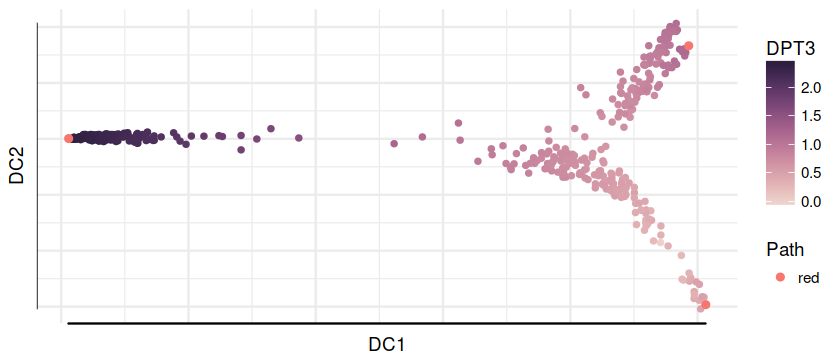

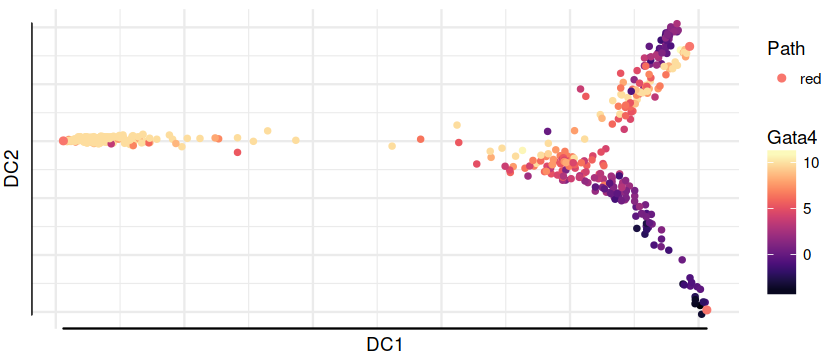

In [7]:
par(mfrow = c(1,2), mar = c(2,2,0,1))
plot(dpt, col_by = 'DPT3')
plot(dpt, col_by = 'Gata4', pal = viridis::magma)

In [8]:
options(old)

The `DPT` object also contains a clustering based on the tip cells and DPT, and you can specify where to draw paths from and to:

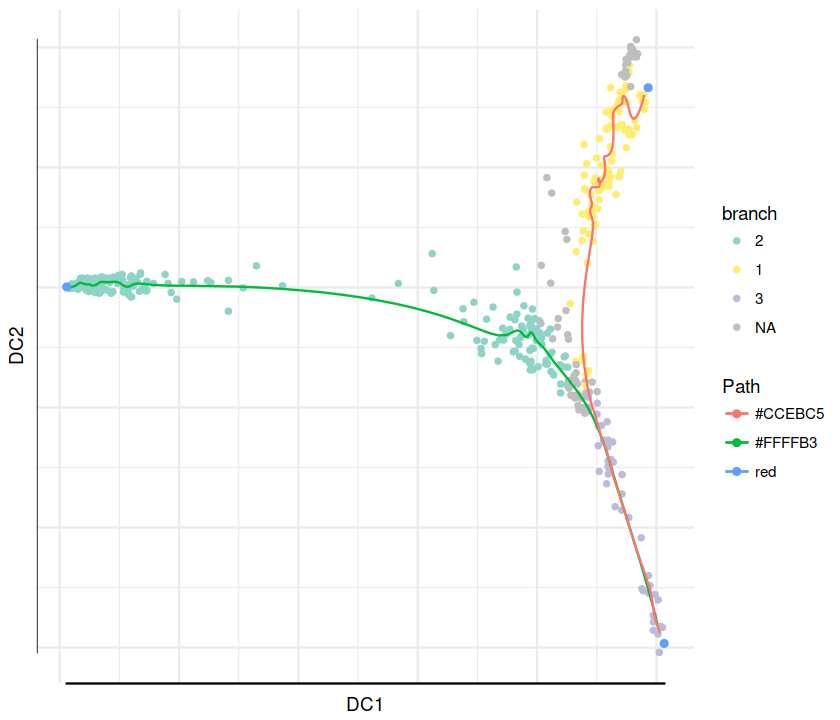

In [9]:
plot(dpt, root = 2, paths_to = c(1,3), col_by = 'branch')

You can further divide branches. First simply plot branch colors like we did above, then identify the number of the branch you intend to plot, and then specify it in a subsequent `plot` call. In order to see the new branches best, we specify a `dcs` argument that visually spreads out out all four branches.

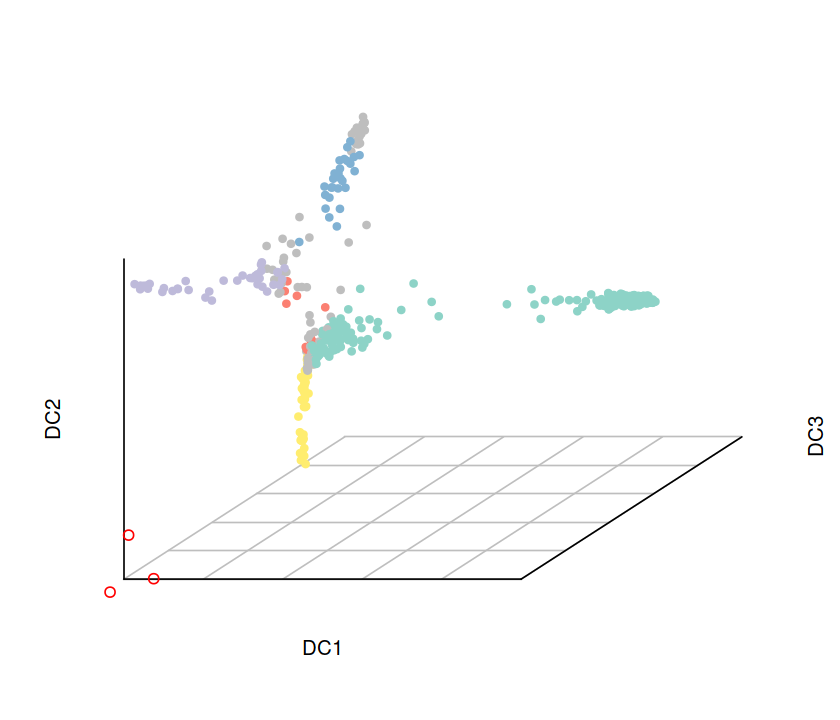

In [10]:
plot(dpt, col_by = 'branch', divide = 3, dcs = c(-1,-3,2), pch = 20)